# COVID-19 State Level Data
## Description
### Summarizing States
For cases and deaths related to COVID-19, function `state_summary` creates 3 graphs for state named in `state_to_graph`.  These 3 graphs are

* Cumulative COVID-19 Totals by Day
* Daily Increase in COVID-19 Totals by Day
* Death Probability of COVID-19 by Day

In [1]:
state_to_graph = 'Massachusetts'

### Comparing States
Function `compare_states` creates 9 graphs and plots one line for each state in `state_to_graph`.  These 9 graphs are

* Cumulative Cases by Day
* Cumulative Cases by Day (Normalized by Population)
* Cumulative Deaths by Day
* Cumulative Deaths by Day (Normalized by Population)
* New Cases by Day
* New Cases by Day (Normalized by Population)
* New Deaths by Day
* New Deaths by Day (Normalized by Population)
* Death Probability by Day

In [2]:
states_to_compare = [
    'Massachusetts',
    'Maine',
    'New Hampshire',
    'Vermont',
    'Connecticut',
    'Rhode Island'
]

## Dataset Building
### Adding NYTimes data

In [3]:
import matplotlib.pyplot as plt
import io
import pandas as pd
import requests

from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

In [4]:
states_url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
s=requests.get(states_url).content
states=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [5]:
states['date'] = pd.to_datetime(states['date'])
states = states.set_index(['state', 'date'])
states['yesterday'] = states.index.get_level_values(1) - timedelta(days=1)

In [6]:
# joining states with itself to relate today's data to yesterday's
states = states.join(
    other=states,
    on=[states.index.get_level_values(0).to_series(), states['yesterday']],
    how='left',
    rsuffix='_yesterday'
)

In [7]:
states['new_cases'] = states['cases'] - states['cases_yesterday']
states['new_deaths'] = states['deaths'] - states['deaths_yesterday']
states['death_probability'] = states['deaths']/states['cases']

In [8]:
# removing junk columns
states = states.drop(['yesterday', 'fips_yesterday', 'cases_yesterday', 'deaths_yesterday', 'yesterday_yesterday'], axis=1)

In [9]:
states = states.reset_index()

In [10]:
states.head()

,state,date,fips,cases,deaths,new_cases,new_deaths,death_probability
0,Washington,2020-01-21,53,1,0,NaN,NaN,0.0
1,Washington,2020-01-22,53,1,0,0.0,0.0,0.0
2,Washington,2020-01-23,53,1,0,0.0,0.0,0.0
3,Illinois,2020-01-24,17,1,0,NaN,NaN,0.0
4,Washington,2020-01-24,53,1,0,0.0,0.0,0.0


### Adding Population Data

In [11]:
populations = pd.read_csv('state-population.csv')
populations = populations.set_index('state')

In [12]:
populations.head()

,population
state,
Alabama,4903185
Alaska,731545
American Samoa,51504
Arizona,7278717
Arkansas,3017804


In [13]:
states = states.join(
    other=populations,
    on=states['state'],
    how='left'
)

In [14]:
states.head()

,state,date,fips,cases,deaths,new_cases,new_deaths,death_probability,population
0,Washington,2020-01-21,53,1,0,NaN,NaN,0.0,7614893
1,Washington,2020-01-22,53,1,0,0.0,0.0,0.0,7614893
2,Washington,2020-01-23,53,1,0,0.0,0.0,0.0,7614893
3,Illinois,2020-01-24,17,1,0,NaN,NaN,0.0,12671821
4,Washington,2020-01-24,53,1,0,0.0,0.0,0.0,7614893


In [15]:
# Normalizing cases/deaths/new_cases/new_deaths by Population
states['cases_normalized'] = states['cases']/states['population']
states['deaths_normalized'] = states['deaths']/states['population']
states['new_cases_normalized'] = states['new_cases']/states['population']
states['new_deaths_normalized'] = states['new_deaths']/states['population']

## Analysis

In [16]:
def get_state_df(chosen_state):
    return states[states['state'] == chosen_state]

In [17]:
def state_summary(chosen_state): 
    my_state = get_state_df(chosen_state)
    max_date_str = max(states['date']).strftime('%Y-%m-%d')
    # cumulative
    plt.plot(my_state['date'], my_state['cases'], 'red')
    plt.plot(my_state['date'], my_state['deaths'], 'black')
    plt.legend(['cases', 'deaths'])
    plt.xticks(rotation=45)
    plt.title('Cumulative COVID-19 Totals in '+chosen_state+'\nData as of '+max_date_str)
    plt.show()
    # daily increase
    plt.plot(my_state['date'], my_state['new_cases'], 'red')
    plt.plot(my_state['date'], my_state['new_deaths'], 'black')
    plt.legend(['cases', 'deaths'])
    plt.title('Daily Increase in COVID-19 Totals in '+chosen_state+'\nData as of '+max_date_str)
    plt.xticks(rotation=45)
    plt.show()
    # death probability
    plt.plot(my_state['date'], my_state['death_probability'], 'black')
    plt.title('Death Probability of COVID-19 in '+chosen_state+'\nData as of '+max_date_str)
    plt.xticks(rotation=45)
    plt.show()

In [18]:
def compare_states(state_names):
    metrics = [
        'cases',
        'cases_normalized',
        'deaths',
        'deaths_normalized',
        'new_cases',
        'new_cases_normalized',
        'new_deaths',
        'new_deaths_normalized',
        'death_probability'
    ]
    max_date_str = max(states['date']).strftime('%Y-%m-%d')
    for metric in metrics:
        for chosen_state in state_names:
            state_df = get_state_df(chosen_state)
            plt.plot(state_df['date'], state_df[metric])
        plt.legend(state_names)
        plt.xticks(rotation=45)
        plt.title('COVID-19 '+metric+'\nData as of '+max_date_str)
        plt.show()

## Graphs

/home/scooke/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


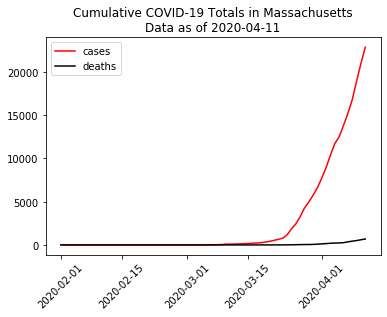

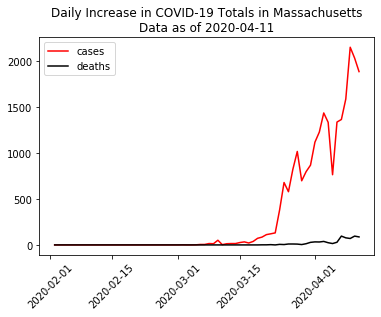

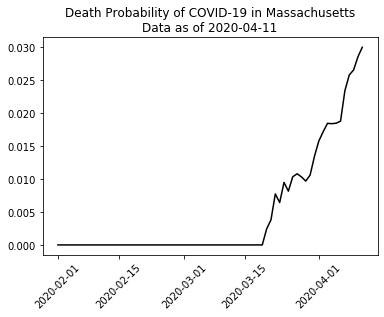

In [19]:
state_summary(state_to_graph)

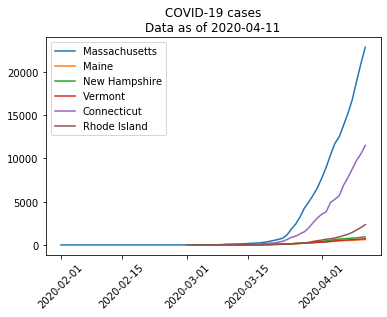

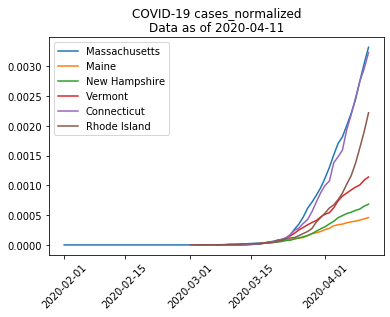

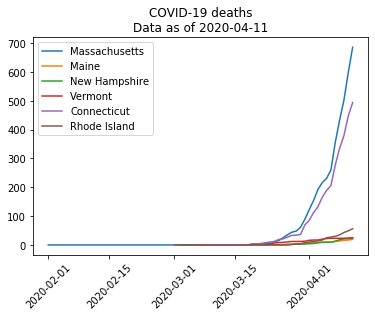

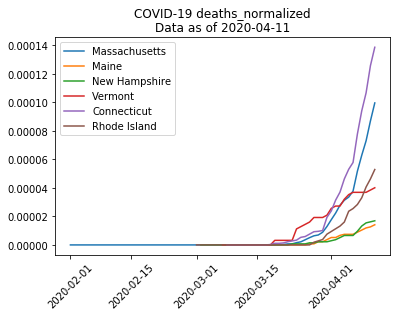

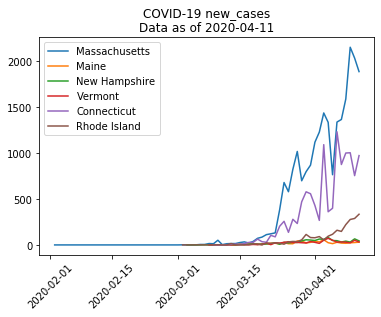

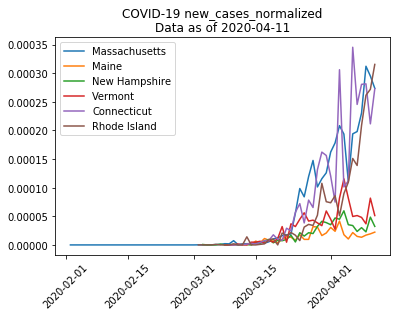

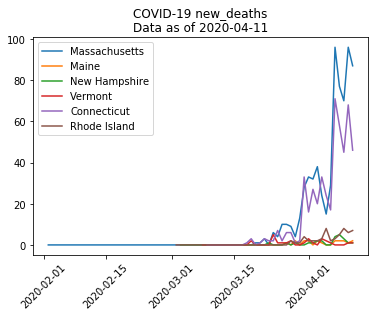

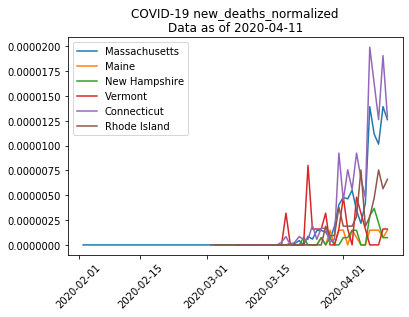

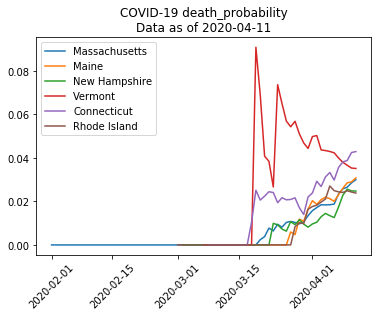

In [20]:
compare_states(states_to_compare)